In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torch.nn.functional as F
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
# Import model classes (BigCNN, LittleCNN, MLP)
from models.big_cnn import BigCNN
from models.little_cnn import LittleCNN
from models.mlp import MLP


In [2]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
test_dataset = torchvision.datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)


In [3]:
checkpoint = torch.load('/Users/nurs/Documents/DLRG/DLRG/Nursultan/Assignment_3/logs/model_weights.ckpt')

# For BigCNN
model_big_cnn = BigCNN()
big_cnn_state_dict = {key.replace('big_cnn.', ''): value for key, value in checkpoint['state_dict'].items() if key.startswith('big_cnn.')}
model_big_cnn.load_state_dict(big_cnn_state_dict)

# For LittleCNN
model_little_cnn = LittleCNN()
little_cnn_state_dict = {key.replace('little_cnn.', ''): value for key, value in checkpoint['state_dict'].items() if key.startswith('little_cnn.')}
model_little_cnn.load_state_dict(little_cnn_state_dict)

# For MLP
model_mlp = MLP()
mlp_state_dict = {key.replace('mlp.', ''): value for key, value in checkpoint['state_dict'].items() if key.startswith('mlp.')}
model_mlp.load_state_dict(mlp_state_dict)


<All keys matched successfully>

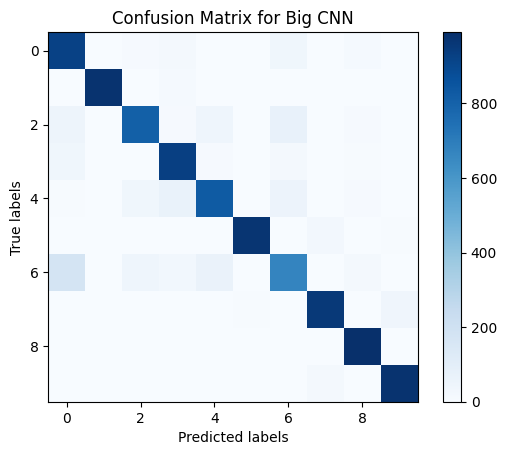

In [4]:
model_big_cnn.eval()  # Set the model to evaluation mode

all_labels = []
all_preds = []
with torch.no_grad():
    for images, labels in test_loader:
        outputs = model_big_cnn(images)  
        _, predicted = torch.max(outputs, 1)
        all_labels.extend(labels)
        all_preds.extend(predicted)

cm = confusion_matrix(all_labels, all_preds)

plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()
# Add title and labels
plt.title('Confusion Matrix for Big CNN')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()


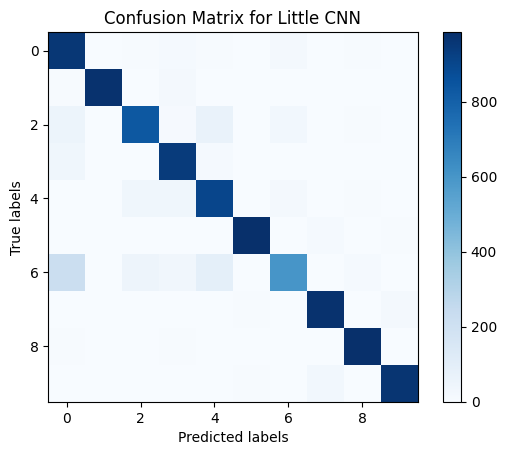

In [5]:
model_little_cnn.eval()  # Set the model to evaluation mode

all_labels = []
all_preds = []
with torch.no_grad():
    for images, labels in test_loader:
        outputs = model_little_cnn(images) 
        _, predicted = torch.max(outputs, 1)
        all_labels.extend(labels)
        all_preds.extend(predicted)

cm = confusion_matrix(all_labels, all_preds)

plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()
# Add title and labels
plt.title('Confusion Matrix for Little CNN')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()



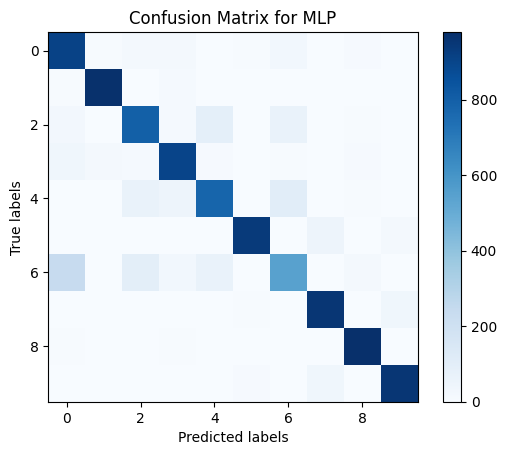

In [6]:
model_mlp.eval()  # Set the model to evaluation mode

all_labels = []
all_preds = []
with torch.no_grad():
    for images, labels in test_loader:
        outputs = model_mlp(images) 
        _, predicted = torch.max(outputs, 1)
        all_labels.extend(labels)
        all_preds.extend(predicted)

cm = confusion_matrix(all_labels, all_preds)

plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()
# Add title and labels
plt.title('Confusion Matrix for MLP')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

In [7]:
losses = []
images_store = []
labels_store = []
preds_store = []

with torch.no_grad():
    for images, labels in test_loader:
        outputs = model_big_cnn(images)  
        loss = F.cross_entropy(outputs, labels, reduction='none')
        losses.extend(loss.tolist())
        images_store.extend(images)
        labels_store.extend(labels.tolist())
        _, preds = torch.max(outputs, 1)
        preds_store.extend(preds.tolist())

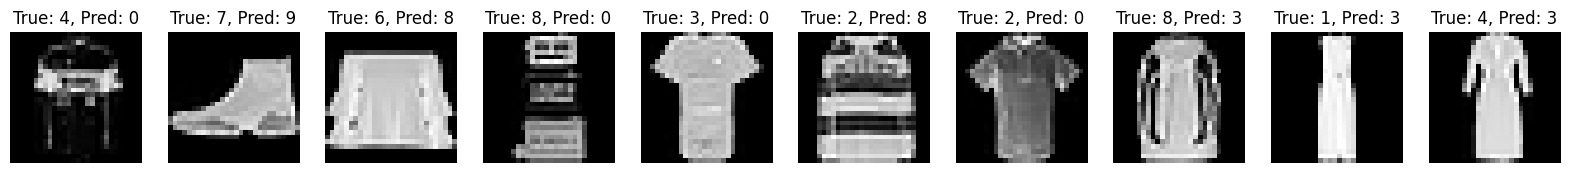

In [8]:
import numpy as np

# Convert lists to numpy arrays for easier handling
losses = np.array(losses)
images_store = np.array(images_store)
labels_store = np.array(labels_store)
preds_store = np.array(preds_store)

# Get the indices of the samples with the highest losses
num_samples_to_display = 10
highest_loss_indices = np.argsort(losses)[-num_samples_to_display:]

fig, axes = plt.subplots(1, num_samples_to_display, figsize=(20, 4))
for i, ax in enumerate(axes):
    idx = highest_loss_indices[i]
    ax.imshow(images_store[idx].squeeze(), cmap='gray')
    ax.set_title(f"True: {labels_store[idx]}, Pred: {preds_store[idx]}")
    ax.axis('off')
plt.show()

In [9]:
# 10 samples with highest loss are given above. Pullovers, dresses, and t-shirts are confused often. Dresses and coats are also confused 
# with each other. In the second figure basketball sneaker is predicted as ankle boot. From confusion matrix, we can see that shirts are often
# misclassified as t-shirts.